### 1.2 Information sur les données

# Apprentissage supervisé - Classification

## 1 - Préparation des données

### 1.1 - Téléchargement de données

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [104]:
mnist = fetch_openml(name="mnist_784", version=1)

### 1.2 - Information sur les données

In [105]:
# Afficher les clés du dictionnaire
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [106]:
#Séparer les features et la target
X, y = mnist['data'], mnist['target']
# Afficher le nombre de features
print('Shape de X:', X.shape)
# Afficher le nombre de labels
print('Shape de y:', y.shape)
# Afficher les différentes classes
print('Différentes classes:',np.unique(y))



Shape de X: (70000, 784)
Shape de y: (70000,)
Différentes classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [107]:
# Afficher une déscription de la base de données
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

'5'

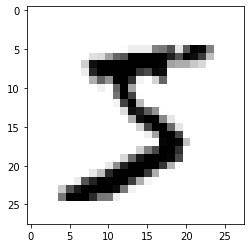

In [108]:
# Afficher la première image 
digit = X[0].reshape(28, 28)
plt.imshow(digit, cmap=plt.cm.gray_r)

#  Afficher la classe de cette instance
y[0]

In [109]:
# Afficher le type des classes
type(y[0])

str

In [110]:
# Changer le type pour passer de str à int
y = y.astype(np.uint8)
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### 1.3 - Répartition des données

In [194]:
# Separer le dataset en train et test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 2 -  Apprentissage d’un classifieur binaire

### 2.1 - Apprentissage des données

In [112]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

In [113]:
# Créer les matrices booléennes en fonction de 5 
bool_5_test = y_test == 5
bool_5_train = y_train == 5

In [114]:
# Créer le modèle
model = SGDClassifier().fit(X_train, bool_5_train)

In [115]:
# Afficher le score du modèle
model.score(X_test, bool_5_test)

0.9664

### 2.2 - Évaluation du modèle d’apprentissage sur les données d’apprentissage

#### 2.2.1 - Taux de classification

In [116]:
# Création de plusieurs modèles avec cross_val_score
scores = cross_val_score(model, X_test, bool_5_test, cv=3, scoring='accuracy')
print('Scores des modèles: ', scores)
print('Score moyen des modèles: ', scores.mean())

Scores des modèles:  [0.95440912 0.96039604 0.95889589]
Score moyen des modèles:  0.9579003491230947


In [117]:
from sklearn.base import BaseEstimator

# Créer la class Never5Classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [118]:
# Créer une instance
classifier = Never5Classifier()
# Afficher le score de chaque modèle
scores = cross_val_score(classifier, X_test, bool_5_test, cv=3, scoring='accuracy')
print('Scores des modèles: ', scores)
print('Score moyen des modèles: ', scores.mean())

Scores des modèles:  [0.90791842 0.91029103 0.91419142]
Score moyen des modèles:  0.9108002881871871


#### 2.2.2 - Matrice de confusion:

In [119]:
y_pred = cross_val_predict(model, X_test, bool_5_test, cv=3)
y_pred

array([False, False, False, ..., False,  True, False])

In [120]:
from sklearn.metrics import confusion_matrix

# Afficher la matrice de confusion
vn, fp, fn, vp = confusion_matrix(bool_5_test, y_pred).ravel()
print("Vrais positifs: ", vp)
print("Vrais négatifs: ", vn)
print("Faux positifs: ", fp)
print("Faux négatifs: ", fp)

Vrais positifs:  661
Vrais négatifs:  8895
Faux positifs:  213
Faux négatifs:  213


#### 2.2.3 - Précision et rappel:

In [150]:
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve, roc_curve, roc_auc_score

In [131]:
print("F1 score: {0:0.2f}".format(f1_score(bool_5_test, y_pred)))
print("Precision score: {0:0.2f}".format(precision_score(bool_5_test, y_pred)))
print("Recall score: {0:0.2f}".format(recall_score(bool_5_test, y_pred)))

F1 score: 0.75
Precision score: 0.76
Recall score: 0.74


In [132]:
y_pred = cross_val_predict(model, X_test, bool_5_test, cv=3, method="decision_function")

array([-252318.3875591 ,  -93811.97115183, -179279.12460732, ...,
       -246459.63864746,   65787.78213525, -569006.03867275])

In [142]:
precision, recall, thresholds = precision_recall_curve(bool_5_test, y_pred)

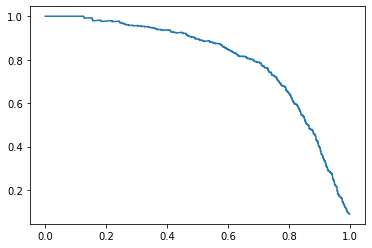

In [137]:
plt.plot(recall, precision)

#### 2.2.4 Courbe ROC:

In [144]:
fp, tp, thresholds = roc_curve(bool_5_test, y_pred)

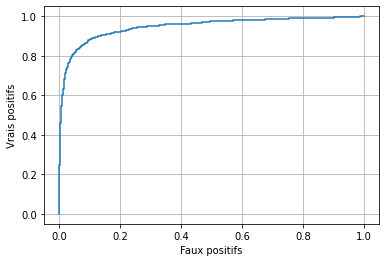

In [149]:
# Afficher la courbe
plt.plot(fp, tp)
plt.xlabel("Faux positifs")
plt.ylabel("Vrais positifs")
plt.grid()

In [155]:
# Calculer l'air sous la courbe
print("ROC : {0:0.3f}".format(roc_auc_score(bool_5_test, y_pred)))

ROC : 0.947


## 3 - Apprentissage d’un classifieur multi-classes

In [156]:
model_multi = SGDClassifier().fit(X_train, y_train)

In [163]:
model_multi.predict([X_train[0]])

array([5], dtype=uint8)

In [169]:
model_multi.decision_function(X_train)[0]

array([-18326.82865485, -29345.53635818,  -7400.55666579,  -1124.33747045,
       -26138.77167884,    562.33621181, -18977.2346219 ,  -9525.3548202 ,
       -16381.56807799, -14250.35517815])

In [170]:
model_multi.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 3.2 - Évaluation du modèle d’apprentissage sur les données d’apprentissage

#### 3.2.1 - Taux de classification

In [173]:
cross_val_score(model_multi, X_train, y_train, cv=3, scoring='accuracy')

array([0.8793 , 0.8772 , 0.85555])

In [176]:
from sklearn.preprocessing import StandardScaler

In [196]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

In [186]:
cross_val_score(model_multi, X_train_scale, y_train, cv=3, scoring='accuracy')

IndexError: index 4 is out of bounds for axis 0 with size 1